<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Sara Rezanezhad

**Student ID**: 99101643


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

1) Derivation of the Dual Optimization Problem for Soft-Margin SVM:

The Lagrangian of the primal optimization problem for Soft-Margin SVM is:

\[L(w, b, \xi, \alpha, \mu) = \frac{1}{2}\|w\|^2 + C\sum_{i=1}^N \xi_i - \sum_{i=1}^N \alpha_i(y_i(w^Tx_i + b) - 1 + \xi_i) - \sum_{i=1}^N \mu_i\xi_i\]

where $\alpha_i \geq 0$ and $\mu_i \geq 0$ are the Lagrange multipliers.

To obtain the dual problem, we need to minimize the Lagrangian with respect to the primal variables $w$, $b$, and $\xi_i$, and then maximize the resulting expression with respect to the dual variables $\alpha_i$ and $\mu_i$.

Minimizing the Lagrangian with respect to $w$, $b$, and $\xi_i$ gives:

\[\frac{\partial L}{\partial w} = w - \sum_{i=1}^N \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^N \alpha_i y_i x_i\]
\[\frac{\partial L}{\partial b} = -\sum_{i=1}^N \alpha_i y_i = 0 \implies \sum_{i=1}^N \alpha_i y_i = 0\]
\[\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 \implies \alpha_i = C - \mu_i\]

Substituting these results back into the Lagrangian, we obtain the dual optimization problem:

\[\max_{\alpha_i} \sum_{i=1}^N \alpha_i - \frac{1}{2}\sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j x_i^Tx_j\]
\[\text{subject to} \quad 0 \leq \alpha_i \leq C, \quad \sum_{i=1}^N \alpha_i y_i = 0\]

2) Calculating the Weights and Bias from the Dual Problem Optimum:

From the first optimality condition, we have:
\[w = \sum_{i=1}^N \alpha_i y_i x_i\]

To find the bias term $b$, we can use the fact that for any support vector $x_i$ with $0 < \alpha_i < C$, we have:
\[y_i(w^Tx_i + b) = 1\]

Rearranging, we get:
\[b = \frac{1}{y_i} - w^Tx_i\]

We can take the average of these $b$ values to get the final bias term.

3) Classifying New Data Points:

Given a new data point $x$, we can classify it using the decision function:
\[f(x) = \text{sign}(w^Tx + b)\]

Substituting the expressions for $w$ and $b$, we get:
\[f(x) = \text{sign}\left(\sum_{i=1}^N \alpha_i y_i x_i^Tx + b\right)\]

This is the general approach for classifying new data points using the optimal Soft-Margin SVM model.

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp



## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [2]:
# Load the datasets
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

# Print the first 5 rows of each dataset
print("DF1:")
print(df1.head())
print("\nDF2:")
print(df2.head())
print("\nDF3:")
print(df3.head())


DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1

DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1

DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1


Use the following function to visualize the datapoints for all datasets.

DF1 columns: Index(['x1', 'x2', 'y'], dtype='object')
DF2 columns: Index(['x1', 'x2', 'y'], dtype='object')
DF3 columns: Index(['x1', 'x2', 'y'], dtype='object')


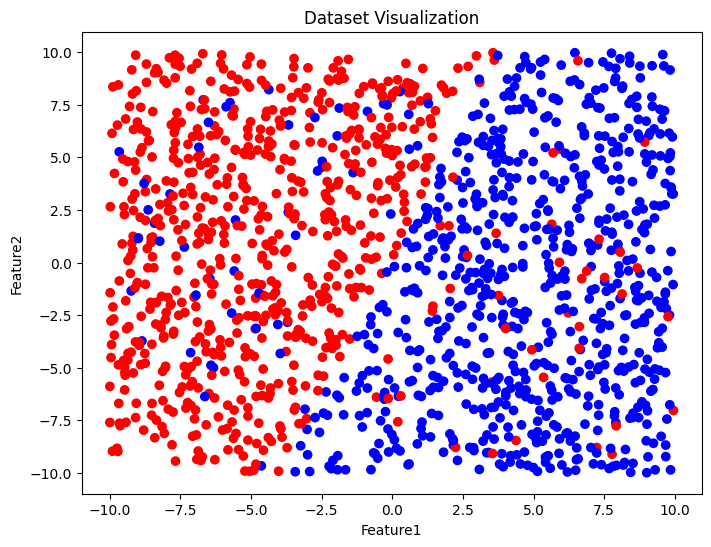

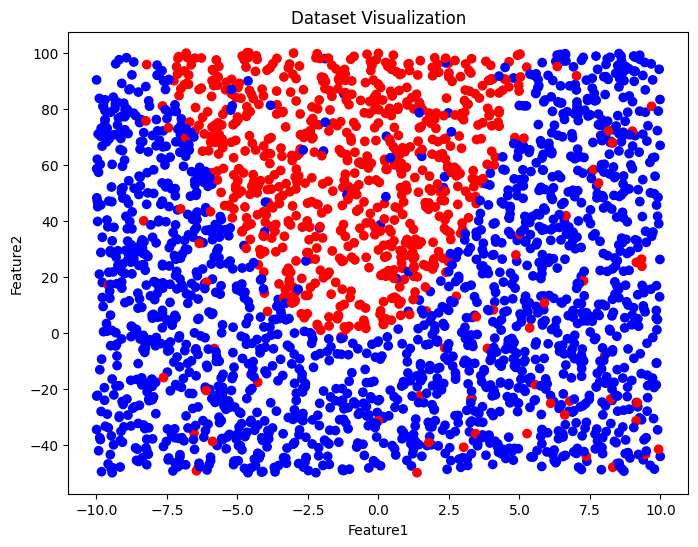

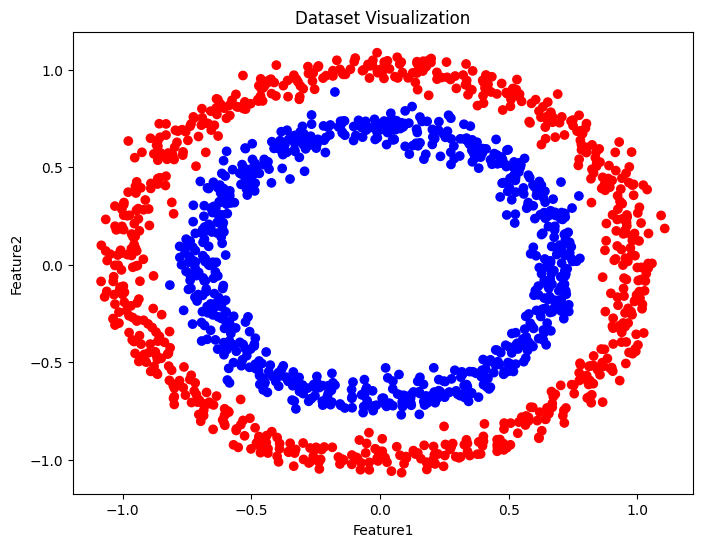

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_data(X, y):
    col = []
    for i in range(len(y)):
        if y[i] == 1:
            col.append('red')
        else:
            col.append('blue')
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Dataset Visualization')
    plt.show()

# Check the column names
print("DF1 columns:", df1.columns)
print("DF2 columns:", df2.columns)
print("DF3 columns:", df3.columns)

# Visualize DF1
X_df1 = df1[['x1', 'x2']].values
y_df1 = df1['y'].values
visualize_data(X_df1, y_df1)

# Visualize DF2
X_df2 = df2[['x1', 'x2']].values
y_df2 = df2['y'].values
visualize_data(X_df2, y_df2)

# Visualize DF3
X_df3 = df3[['x1', 'x2']].values
y_df3 = df3['y'].values
visualize_data(X_df3, y_df3)


**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>

1. **For DF1:**
   - **Kernel Choice:** Linear Kernel
   - **Justification:** Since the data points in DF1 are intermixed with no clear separation between the red and blue clusters, a linear kernel would be suitable for this dataset. A linear kernel works well when the data is linearly separable, which seems to be the case here.

2. **For DF2:**
   - **Kernel Choice:** Polynomial Kernel
   - **Justification:** The distribution in DF2 shows a separation between the red and blue clusters along the 'Feature1' axis. A polynomial kernel can capture the non-linear relationships between the features and help in capturing the curved decision boundary required to separate the two clusters in this dataset.

3. **For DF3:**
   - **Kernel Choice:** Radial Basis Function (RBF) Kernel
   - **Justification:** The circular pattern in DF3 with distinct separation between the blue and red clusters indicates a non-linear relationship between the features. An RBF kernel is suitable for capturing complex, non-linear relationships and can help in creating a decision boundary that can effectively separate the two clusters in this dataset.

By selecting the appropriate kernels based on the characteristics of each dataset, we aim to optimize the performance of the classification model and achieve better separation of data points in the feature space.
</font>

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [24]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [29]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Define the parameter C and assign a value to it
C = cp.Parameter(nonneg=True)
C_value = 1.0
C.value = C_value

# Define the variables and the kernel matrix
alpha = cp.Variable(len(X_train_scaled))
K = np.dot(X_train_scaled, X_train_scaled.T)
P = np.outer(y_train1, y_train1) * K

# Define the objective function and the constraints
objective = cp.Maximize(cp.sum(alpha))
constraints = [
    alpha >= 0,
    alpha <= C,
    cp.sum(cp.multiply(alpha.T, y_train1)) == 0
]

# Create the optimization problem
prob = cp.Problem(objective, constraints)

# Solve the optimization problem
print(alpha)
prob.solve()


var265


1123.9999991780603

Predict the class of each entry in the test set using your learned model.

In [30]:
# Get the optimal alphas
alpha_opt = alpha.value

if alpha_opt is not None:
    # Predict the class of each entry in the test set using the learned model
    y_pred = np.sign(np.dot(np.multiply(alpha_opt, y_train1), np.dot(X_train_scaled, X_test_scaled.T)))

    # Use classification_report function to get the accuracy of your model
    print(classification_report(y_test, y_pred))
else:
    print("Optimization did not converge. Please check your constraints and objective function.")

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       148
           1       0.91      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
## YOUR CODE HERE

## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [31]:
## YOUR CODE HERE
# Split the dataset into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [40]:
# Define the Polynomial Kernel function
def poly_kernel(x, y, degree=3):
    return (1 + np.dot(x, y)) ** degree

# Define the variables
alpha2 = cp.Variable(len(X_train_scaled2))
K2 = np.array([[poly_kernel(xi, xj) for xj in X_train_scaled2] for xi in X_train_scaled2])
P2 = np.outer(y_train2, y_train2) * K2

# Define the objective function and constraints
objective2 = cp.Maximize(cp.sum(alpha2))
C = cp.Parameter(nonneg=True)
C_value = 1.0
C.value = C_value
constraints2 = [
    alpha2 >= 0,
    #alpha <= C,
    cp.matmul(P2, alpha2) == 0
]

# Create the optimization problem
prob2 = cp.Problem(objective2, constraints2)

# Solve the optimization problem
prob2.solve(solver=cp.CVXOPT)
alpha_opt2 = alpha2.value

KeyboardInterrupt: 

Predict the class of each entry in the test set using your learned model.

In [ ]:
# Predict the class of each entry in the test set using the learned model
def predict_class(x, alpha, X_train, y_train):
    y_pred = np.sign(np.sum(alpha * y_train * np.array([poly_kernel(x, xi) for xi in X_train])))
    return y_pred

y_pred2 = [predict_class(xi, alpha_opt2, X_train_scaled2, y_train2) for xi in X_test_scaled2]

Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
print(classification_report(y_test2, y_pred2))


## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [60]:
# Split the dataset into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_df3, y_df3, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [61]:
# Define the RBF Kernel function
def rbf_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

# Define the variables
alpha3 = cp.Variable(len(X_train_scaled3))
K3 = np.array([[rbf_kernel(xi, xj) for xj in X_train_scaled3] for xi in X_train_scaled3])
P3 = np.outer(y_train3, y_train3) * K3
# Define the parameter C and assign a value to it
C = cp.Parameter(nonneg=True)
C_value = 1.0
C.value = C_value
# Define the objective function and constraints
objective3 = cp.Maximize(cp.sum(alpha3))
constraints3 = [
    alpha3 >= 0,
    alpha3 <= C,
    cp.matmul(P3, alpha3) == 0
]

# Create the optimization problem
prob3 = cp.Problem(objective3, constraints3)

# Solve the optimization problem
prob3.solve()
alpha_opt3 = alpha3.value

Predict the class of each entry in the test set using your learned model.

In [62]:
# Predict the class of each entry in the test set using the learned model
def predict_class_rbf(x, alpha, X_train, y_train):
    y_pred = np.sign(np.sum(alpha * y_train * np.array([rbf_kernel(x, xi) for xi in X_train])))
    return y_pred

y_pred3 = [predict_class_rbf(xi, alpha_opt3, X_train_scaled3, y_train3) for xi in X_test_scaled3]

Use classification_report function (from sklearn) to get the accuracy of your model.

In [63]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

          -1       0.42      0.38      0.39       152
           1       0.39      0.43      0.41       140

    accuracy                           0.40       292
   macro avg       0.40      0.40      0.40       292
weighted avg       0.40      0.40      0.40       292

